In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('./owid-energy-data.csv');
df['fossil_consumption'] = df['fossil_fuel_consumption']
df['biofuel_energy_per_capita'] = df['biofuel_cons_per_capita']

In [38]:
import itertools

stat_suffix = ['consumption', 'share_energy', 'share_elec','electricity']
fuel = ['biofuel','coal','gas','hydro','nuclear','oil', 'solar','wind']

for items in itertools.product(fuel, stat_suffix):
    df["_".join(items)];

In [60]:
df2 = pd.concat([df[['country','year', 'gdp']], df.filter(like=stat_suffix[0])], axis=1)[df['year']> 1990]
df2.head()

,country,year,gdp,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption,fossil_consumption
91,Afghanistan,1991,2.407639e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.651,NaN,NaN,NaN,NaN
92,Afghanistan,1992,2.447247e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.961,NaN,NaN,NaN,NaN
93,Afghanistan,1993,1.836324e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.935,NaN,NaN,NaN,NaN
94,Afghanistan,1994,1.427119e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.617,NaN,NaN,NaN,NaN
95,Afghanistan,1995,2.140894e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.246,NaN,NaN,NaN,NaN


In [65]:
selected_stat = stat_suffix[0]
stats = ["_".join(items) for items in itertools.product(fuel, [selected_stat])]

/var/folders/wq/t23_fvb50gq4b9nw_9pnfcww0000gn/T/ipykernel_82791/2350058351.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[(df2['country'].isin(country_list)) & (df['year'] == 2019)][['country']+stats]


<AxesSubplot:ylabel='country'>

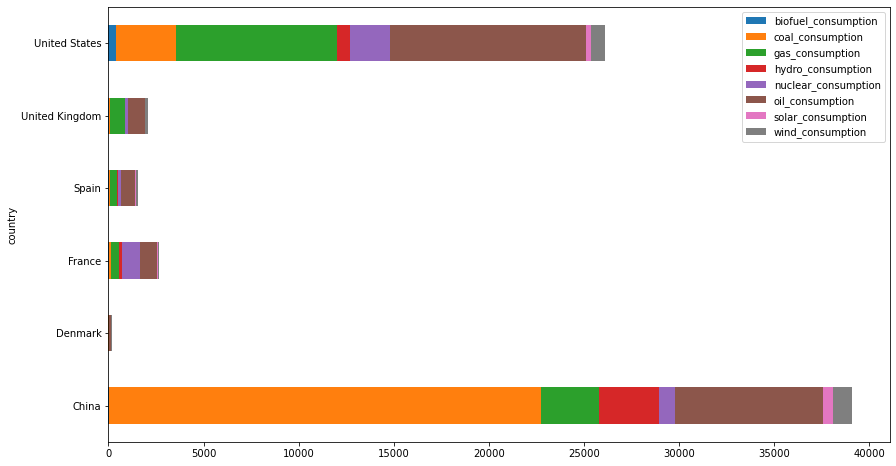

In [76]:
fig, ax = plt.subplots(figsize=(14,8))
country_list = ['China', 'United States', 'United Kingdom', 'France', 'Spain', 'Denmark']
df3 = df2[(df2['country'].isin(country_list)) & (df['year'] == 2019)][['country']+stats]
df3 = df3.set_index('country')
df3.plot(kind="barh", ax=ax, stacked=True)


# .plot(x='country', ax=ax, kind='barh', stacked=True);
# ax.set_title('% Electricity generated by Solar');
# ax.legend(country_list);